In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy as np
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing import image
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from tensorflow.keras.models import model_from_json



In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train)
print(y_test)

(60000, 28, 28)
(10000, 28, 28)
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


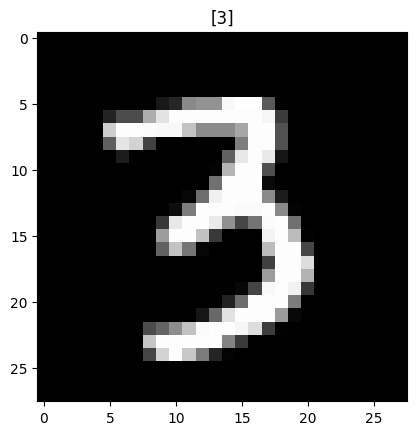

In [4]:
i = random.randint(0,60000)
plt.imshow(x_train[i],cmap='gray') # Color map
plt.title([y_train[i]])
plt.show()

In [5]:
print("Traindeki benzersiz değerler : ",np.unique(y_train,return_counts=True))
print("Testteki benzersiz değerler : ",np.unique(y_test,return_counts=True))


Traindeki benzersiz değerler :  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))
Testteki benzersiz değerler :  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
      dtype=int64))


In [6]:
# Normalizasyon : değeri 0-1 arasında küçültme
x_train=x_train/255
x_test = x_test/255
print(x_train.max())
print(x_train.min())

1.0
0.0


In [7]:
model = keras.models.Sequential()
model.add(Flatten(input_shape=(28,28))) # 784
model.add(Dense(392,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)
print(history)

Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 0.2302 - accuracy: 0.9325 - val_loss: 0.1248 - val_accuracy: 0.9650
Epoch 2/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0943 - accuracy: 0.9708 - val_loss: 0.0963 - val_accuracy: 0.9722
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0619 - accuracy: 0.9813 - val_loss: 0.0822 - val_accuracy: 0.9749
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0434 - accuracy: 0.9866 - val_loss: 0.0852 - val_accuracy: 0.9739
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0759 - val_accuracy: 0.9783
Epoch 6/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0237 - accuracy: 0.9927 - val_loss: 0.0892 - val_accuracy: 0.9761
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0197 - accuracy: 0.9935 - val_loss: 0.0840 - val_accuracy

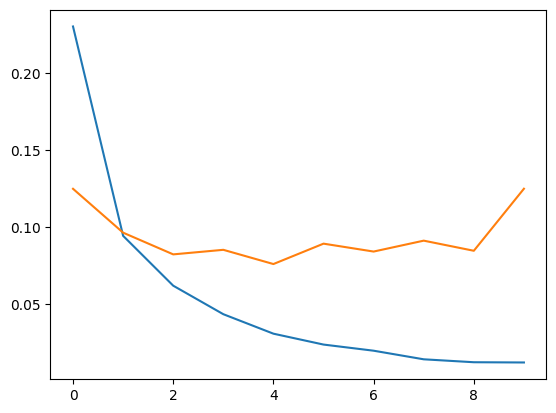

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

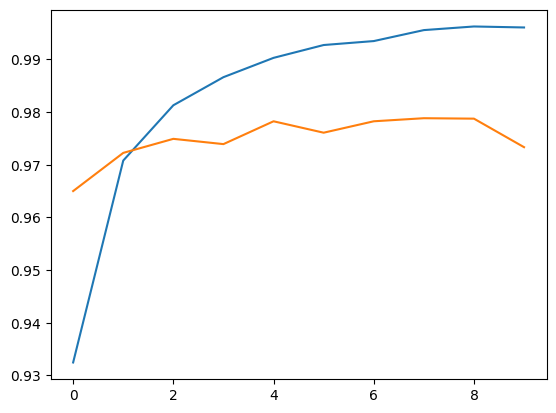

In [9]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [10]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [11]:
accuracy_score(y_pred,y_test)

0.9764

In [12]:
confusion_matrix(y_pred,y_test)

array([[ 970,    0,    2,    2,    1,    3,    3,    1,    2,    1],
       [   1, 1120,    2,    0,    0,    0,    1,    4,    0,    6],
       [   1,    2, 1007,    2,    3,    0,    0,    5,    0,    0],
       [   0,    0,    2,  971,    0,    7,    1,    1,    1,    0],
       [   0,    0,    0,    0,  958,    0,    1,    1,    0,    3],
       [   0,    0,    0,    3,    0,  855,    1,    0,    0,    4],
       [   2,    4,    2,    0,    5,    7,  944,    0,    0,    0],
       [   1,    0,    3,    8,    0,    1,    0, 1008,    1,   12],
       [   5,    8,   14,   21,    4,   16,    7,    7,  969,   21],
       [   0,    1,    0,    3,   11,    3,    0,    1,    1,  962]],
      dtype=int64)

In [13]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       985
           1       0.99      0.99      0.99      1134
           2       0.98      0.99      0.98      1020
           3       0.96      0.99      0.97       983
           4       0.98      0.99      0.99       963
           5       0.96      0.99      0.97       863
           6       0.99      0.98      0.98       964
           7       0.98      0.97      0.98      1034
           8       0.99      0.90      0.95      1072
           9       0.95      0.98      0.97       982

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [14]:
model_json = model.to_json()
with open("mnist.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("mnist.h5")
print("Saved model to disk")

Saved model to disk
